In [10]:
pip install librosa matplotlib

In [11]:
pip install librosa soundfile

In [12]:
!pip install librosa


In [36]:
import IPython.display as ipd
import pandas as pd
from glob import glob

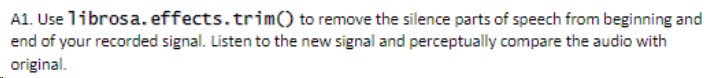




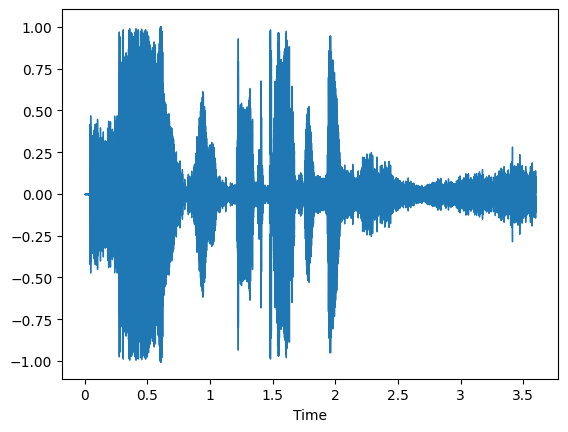

In [15]:
import librosa
#file is the input audio file
file = '/content/WhatsApp Audio 2024-02-05 at 13.37.51.wav'

y, sr = librosa.load(file)
#displaying the waveform of audio
librosa.display.waveshow(y)


In [27]:
yt, index = librosa.effects.trim(y)

In [29]:
print(librosa.get_duration(y=y),librosa.get_duration(y=yt))

3.599092970521542 3.599092970521542


No audio file found.


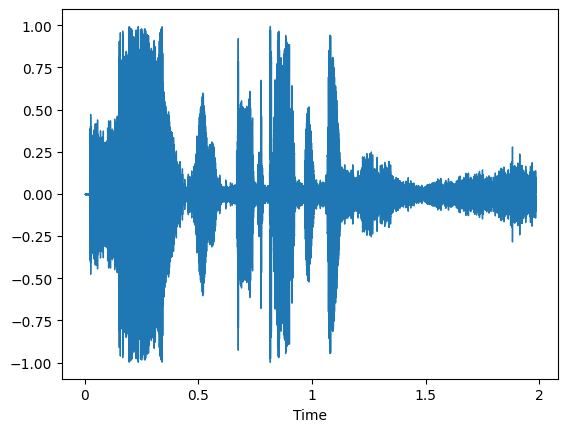

In [38]:
import soundfile as sf
output_file = 'trimmed.wav'
sr = 40000
sf.write(output_file,yt , sr )


from IPython.display import Audio
audio_files_out = glob('trim.wav')
if len(audio_files_out) > 0:
    audio_file = audio_files_out[0]
    display(Audio(audio_file))
else:
    print("No audio file found.")

ys, sr = librosa.load('/content/trimmed.wav')
librosa.display.waveshow(ys)

In [39]:
af = glob('/content/trimmed.wav')
ipd.Audio(af[0])

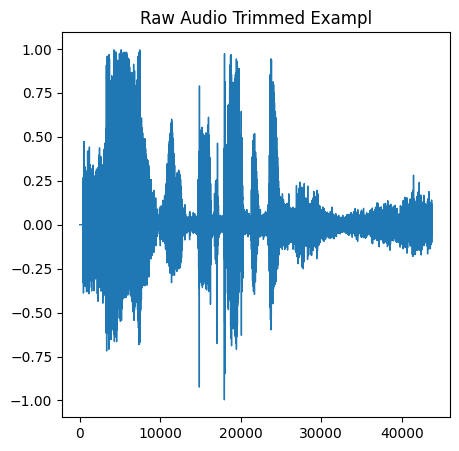

In [52]:
# Trimming leading/lagging silence
# here the input signal is trimmed to 20 decibels
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(5,5 ),
                  lw=1,
                  title='Raw Audio Trimmed Exampl')
plt.show()


# A2. Use librosa.effects.split()to splitthe recorded speech with detected silences.Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

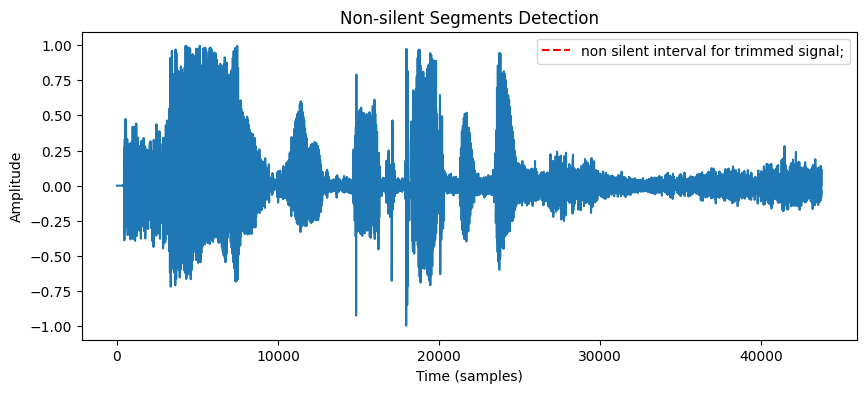

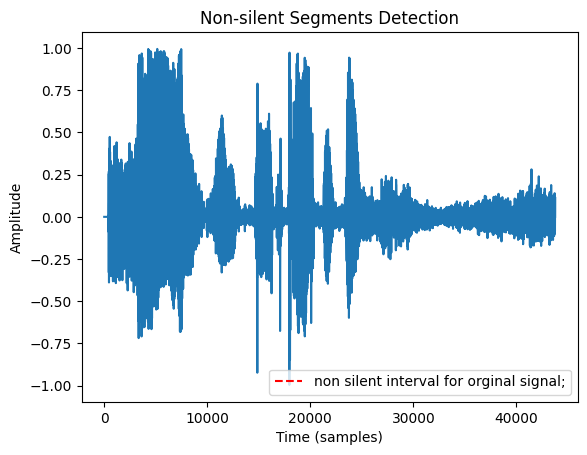

In [65]:
import librosa
import numpy as np

# Load audio file
ysp, sr1 = librosa.load('/content/trimmed.wav')

# Set the threshold for detecting silence (adjust according to your audio)
threshold_db = -40

# Split the audio into non-silent segments
trimmed_audio = librosa.effects.split(ysp, top_db=threshold_db)
original_audio = librosa.effects.split(y, top_db=threshold_db)

# Convert frame indices to time
trimmed_audio_time = librosa.frames_to_time(trimmed_audio, sr=sr1)
original_audio_time = librosa.frames_to_time(original_audio, sr=sr)

# Print the time intervals of non-silent segments
for interval in trimmed_audio_time:
    start_time, end_time = interval
    print(f"trimmed segment: {start_time:.2f}s - {end_time:.2f}s")

for interval in original_audio_time:
    start_time, end_time = interval
    print(f"original segment: {start_time:.2f}s - {end_time:.2f}s")

# Optional: Visualize the non-silent segments
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ysp)
plt.vlines(trimmed_audio.flatten(), -1, 1, color='r', linestyle='--', label='non silent interval for trimmed signal;')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Non-silent Segments Detection')
plt.legend()
plt.show()

plt.plot(y)
plt.vlines(original_audio.flatten(), -1, 1, color='r', linestyle='--', label='non silent interval for orginal signal;')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Non-silent Segments Detection')
plt.legend()
plt.show()


# A3. Use the IEEE paper reference available above for silence detection. Compare the results with the silence detection output from librosa package.

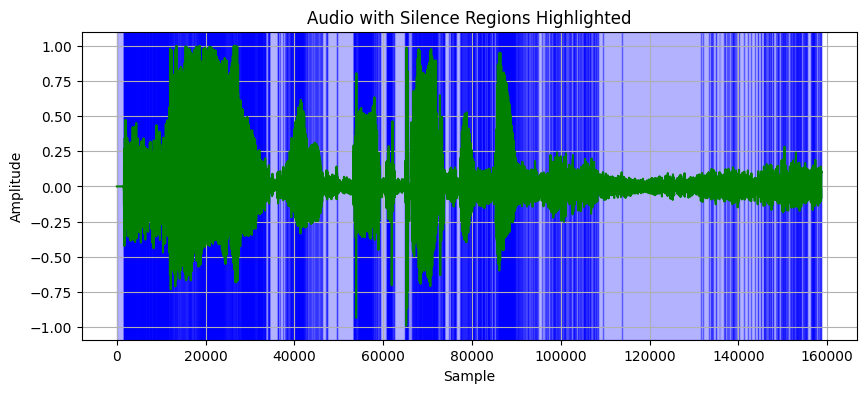

In [64]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "/content/WhatsApp Audio 2024-02-05 at 13.37.51.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# define thurshold
energy_threshold = 0.01  # Adjust this threshold as needed

# Detection of  silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Plot the waveform with silence regions highlighted
plt.figure(figsize=(10, 4))
plt.plot(audio_signal, color='g')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='b', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()